In [1]:
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import networkx as nx
import glob
from PIL import Image
import matplotlib.pyplot as plt 
import torch


from seem_module.utils.constants import COCO_PANOPTIC_CLASSES
from relate_anything.utils import relation_classes

/cmlscratch/nehamk/miniconda3/envs/work/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
glob.glob('coco_visual_graph/*.pt')

['coco_visual_graph/48632_graph.pt',
 'coco_visual_graph/56544_graph.pt',
 'coco_visual_graph/25729_graph.pt',
 'coco_visual_graph/43288_graph.pt',
 'coco_visual_graph/60425_graph.pt',
 'coco_visual_graph/40219_graph.pt',
 'coco_visual_graph/13471_graph.pt',
 'coco_visual_graph/58089_graph.pt',
 'coco_visual_graph/9286_graph.pt',
 'coco_visual_graph/41770_graph.pt',
 'coco_visual_graph/36797_graph.pt',
 'coco_visual_graph/34950_graph.pt',
 'coco_visual_graph/40304_graph.pt',
 'coco_visual_graph/38041_graph.pt',
 'coco_visual_graph/27556_graph.pt',
 'coco_visual_graph/17235_graph.pt',
 'coco_visual_graph/44361_graph.pt',
 'coco_visual_graph/23258_graph.pt',
 'coco_visual_graph/2239_graph.pt',
 'coco_visual_graph/63325_graph.pt',
 'coco_visual_graph/45741_graph.pt',
 'coco_visual_graph/13547_graph.pt',
 'coco_visual_graph/13273_graph.pt',
 'coco_visual_graph/9466_graph.pt',
 'coco_visual_graph/6719_graph.pt',
 'coco_visual_graph/54111_graph.pt',
 'coco_visual_graph/63647_graph.pt',
 'coc

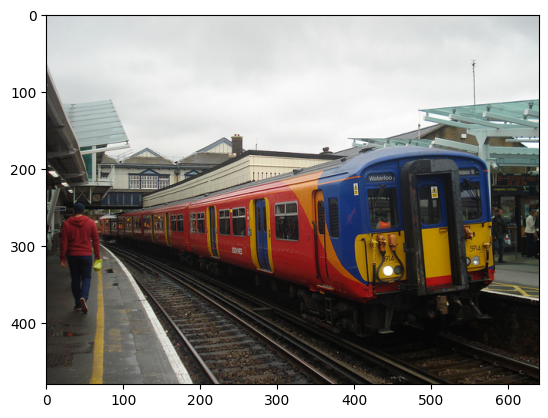

In [47]:
# image = Image.open('/fs/cml-datasets/coco/images/train2017/000000013471.jpg').convert("RGB")
# image = Image.open('person_with_coffee.jpeg').convert("RGB")
# image = Image.open('/fs/cml-datasets/coco/images/train2017/000000010925.jpg').convert("RGB")
# image = Image.open('/fs/cml-datasets/coco/images/train2017/000000001404.jpg').convert("RGB")
# image = Image.open('/fs/cml-datasets/coco/images/train2017/000000008190.jpg').convert("RGB")
# image = Image.open('/fs/cml-datasets/coco/images/train2017/000000009999.jpg').convert("RGB")
# image = Image.open('/fs/cml-datasets/coco/images/train2017/000000000009.jpg').convert("RGB")
# image = Image.open('/fs/cml-datasets/coco/images/train2017/000000048632.jpg').convert("RGB")
image = Image.open('/fs/cml-datasets/coco/images/train2017/000000034950.jpg').convert("RGB")
plt.imshow(image)

In [48]:
graph_obj = torch.load('coco_visual_graph/34950_graph.pt')

In [49]:
node_names = dict([(i, COCO_PANOPTIC_CLASSES[graph_obj.node_attr[i]]) for i in range(len(graph_obj.node_attr))])
node_names

{0: 'person',
 1: 'train',
 2: 'building-other-merged',
 3: 'person',
 4: 'person',
 5: 'person',
 6: 'platform',
 7: 'railroad',
 8: 'person',
 9: 'roof',
 10: 'light',
 11: 'pavement-merged',
 12: 'person',
 13: 'sky-other-merged'}

In [50]:
edge_names = dict([(tuple(graph_obj.edge_index.T[i].numpy()), relation_classes[graph_obj.edge_attr[i]]) for i in range(len(graph_obj.edge_attr))])
edge_names

{(1, 6): 'on',
 (1, 11): 'on',
 (3, 6): 'on',
 (3, 11): 'on',
 (3, 13): 'in',
 (5, 6): 'standing on',
 (5, 11): 'standing on',
 (5, 13): 'in',
 (12, 1): 'beside',
 (12, 6): 'standing on',
 (12, 7): 'standing on',
 (12, 11): 'standing on'}

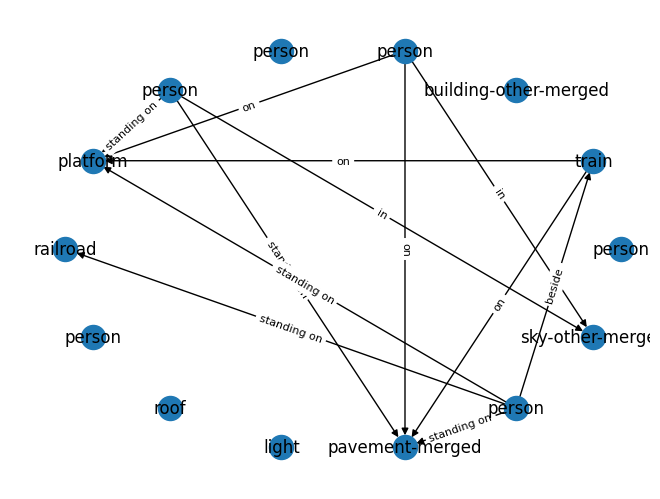

In [51]:
from networkx.drawing.nx_agraph import graphviz_layout
plt.figure(1)

graph = to_networkx(graph_obj)
# pos = graphviz_layout(graph)
pos = nx.circular_layout(graph)

nx.draw(graph, pos, labels = node_names, with_labels = True)

nx.draw_networkx_edge_labels(graph, pos, edge_labels = edge_names, font_size = 8);
